In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import tree,preprocessing 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix


In [56]:
%matplotlib inline

col=['sepal_length','sepal_width','petal_length','petal_width','class']
iris=pd.read_csv("iris.data",names=col)

In [57]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [59]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [60]:
iris.shape

(150, 5)

In [61]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [62]:
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.685694,-0.039268,1.273682,0.516904
sepal_width,-0.039268,0.188004,-0.321713,-0.117981
petal_length,1.273682,-0.321713,3.113179,1.296387
petal_width,0.516904,-0.117981,1.296387,0.582414


## Pre-Processing

In [63]:
label_encoder = preprocessing.LabelEncoder()
iris['class']= label_encoder.fit_transform(iris['class'])

In [64]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## Model Evaluation

In [65]:
train, test = train_test_split(iris, test_size = 0.3)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [66]:
train.shape

(105, 5)

In [67]:
test.shape

(45, 5)

In [68]:
train

,sepal_length,sepal_width,petal_length,petal_width,class
110,6.5,3.2,5.1,2.0,2
149,5.9,3.0,5.1,1.8,2
85,6.0,3.4,4.5,1.6,1
74,6.4,2.9,4.3,1.3,1
17,5.1,3.5,1.4,0.3,0
128,6.4,2.8,5.6,2.1,2
10,5.4,3.7,1.5,0.2,0
127,6.1,3.0,4.9,1.8,2
31,5.4,3.4,1.5,0.4,0
120,6.9,3.2,5.7,2.3,2


In [69]:
test

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,0
134,6.1,2.6,5.6,1.4,2
39,5.1,3.4,1.5,0.2,0
109,7.2,3.6,6.1,2.5,2
89,5.5,2.5,4.0,1.3,1
105,7.6,3.0,6.6,2.1,2
64,5.6,2.9,3.6,1.3,1
11,4.8,3.4,1.6,0.2,0
52,6.9,3.1,4.9,1.5,1
59,5.2,2.7,3.9,1.4,1


In [70]:
all_inputs = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_classes = iris['class'].values

(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, random_state=1)

In [71]:
dtc = tree.DecisionTreeClassifier()
dtc.fit(train_inputs, train_classes)
dtc.score(test_inputs, test_classes)

0.9555555555555556

## Hyperparameter Training

In [97]:
model = tree.DecisionTreeClassifier()
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 10, 100, 1000]
}

clf = GridSearchCV(
    estimator=model, 
    param_grid=params, 
    cv=10,  # 10-fold cross validation
    n_jobs=-1  # run in parallel
)
clf.fit(train_inputs, train_classes)



GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 10, 100, 1000],
                         'splitter': ['best', 'random']})

In [99]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,param_criterion,param_max_depth,param_splitter,params,rank_test_score,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,std_fit_time,std_score_time,std_test_score
0,0.000100,0.000000,0.695455,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",13,0.727273,0.727273,...,0.636364,0.636364,0.7,0.7,0.7,0.7,0.7,0.000300,0.000000,0.031818
1,0.001962,0.000591,0.659091,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",15,0.727273,0.363636,...,0.636364,0.636364,0.7,0.7,0.7,0.7,0.7,0.004578,0.001773,0.102952
2,0.000799,0.000200,0.960909,gini,10,best,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",3,1.000000,1.000000,...,0.909091,1.000000,0.9,1.0,1.0,0.9,0.9,0.000400,0.000401,0.047941
3,0.000800,0.000200,0.932727,gini,10,random,"{'criterion': 'gini', 'max_depth': 10, 'splitt...",9,1.000000,1.000000,...,0.909091,0.818182,0.9,1.0,1.0,0.9,0.8,0.000400,0.000400,0.074877
4,0.000900,0.000100,0.960909,gini,100,best,"{'criterion': 'gini', 'max_depth': 100, 'split...",3,1.000000,1.000000,...,0.909091,1.000000,0.9,1.0,1.0,0.9,0.9,0.000300,0.000300,0.047941
5,0.001001,0.000000,0.961818,gini,100,random,"{'criterion': 'gini', 'max_depth': 100, 'split...",2,1.000000,1.000000,...,0.909091,0.909091,0.9,1.0,1.0,1.0,0.9,0.000002,0.000000,0.046851
6,0.000600,0.000000,0.950909,gini,1000,best,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",7,1.000000,1.000000,...,0.909091,1.000000,0.9,1.0,0.9,0.9,0.9,0.000490,0.000000,0.049158
7,0.000200,0.000600,0.931818,gini,1000,random,"{'criterion': 'gini', 'max_depth': 1000, 'spli...",11,1.000000,1.000000,...,0.909091,0.909091,0.8,0.9,1.0,0.9,0.9,0.000400,0.000490,0.063278
8,0.000900,0.000100,0.695455,entropy,1,best,"{'criterion': 'entropy', 'max_depth': 1, 'spli...",13,0.727273,0.727273,...,0.636364,0.636364,0.7,0.7,0.7,0.7,0.7,0.000300,0.000300,0.031818
9,0.000600,0.000300,0.628182,entropy,1,random,"{'criterion': 'entropy', 'max_depth': 1, 'spli...",16,0.727273,0.545455,...,0.636364,0.545455,0.5,0.6,0.6,0.7,0.7,0.000490,0.000458,0.078567


In [100]:
cv_results = cv_results[['mean_test_score', 'param_criterion', 'param_splitter', 'param_max_depth']]
cv_results.sort_values(by='mean_test_score', ascending=False)

,mean_test_score,param_criterion,param_splitter,param_max_depth
11,0.970909,entropy,random,10
5,0.961818,gini,random,100
2,0.960909,gini,best,10
4,0.960909,gini,best,100
10,0.960909,entropy,best,10
12,0.960909,entropy,best,100
6,0.950909,gini,best,1000
14,0.950909,entropy,best,1000
3,0.932727,gini,random,10
15,0.932727,entropy,random,1000


In [101]:
clf.best_params_


{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}

In [109]:
model = DecisionTreeClassifier()
model.fit(test_inputs, test_classes)
preds = model.predict(train_inputs)

print(f'Accuracy = {round(accuracy_score(train_classes, preds), 2)}')
print()
print(confusion_matrix(train_classes, preds))

Accuracy = 0.94

[[36  0  0]
 [ 0 31  1]
 [ 0  5 32]]


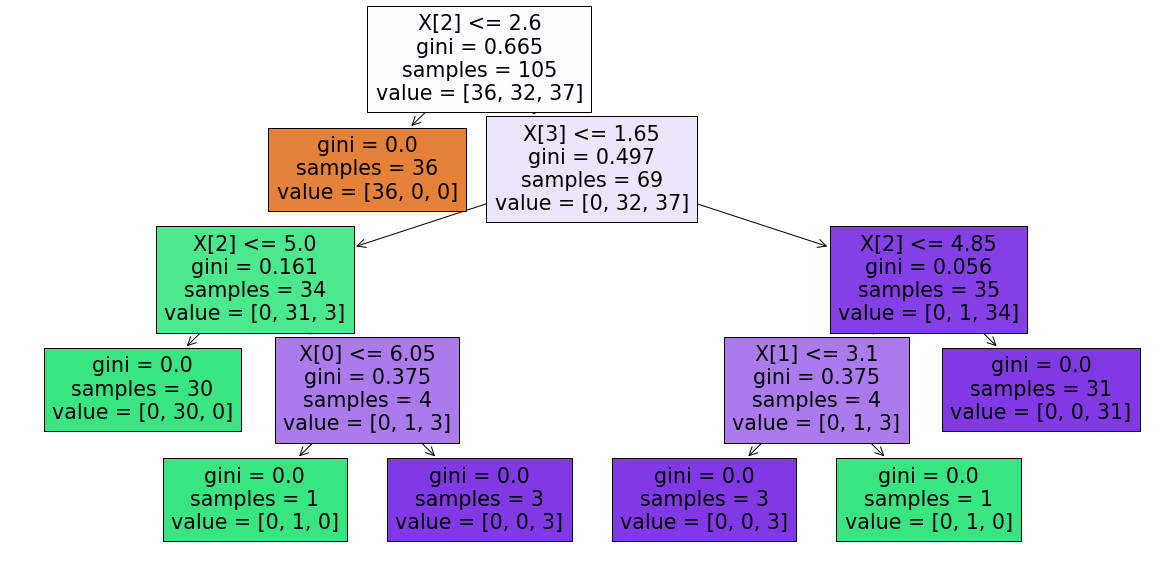

In [87]:
model_all_params = DecisionTreeClassifier().fit(train_inputs, train_classes)
plt.figure(figsize = (20,10))
tree.plot_tree(model_all_params, filled=True)